## Séries Temporais

### Complete guide to Time Series Forecasting (with Codes in Python)
- https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

### How to Check if Time Series Data is Stationary with Python
- https://machinelearningmastery.com/time-series-data-stationary-python/

### How to Create an ARIMA Model for Time Series Forecasting in Python
- https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

### Time Series Forecasting - ARIMA models - Towards Data Science
- https://towardsdatascience.com/time-series-forecasting-arima-models-7f221e9eee06

### ARIMA Model – Complete Guide to Time Series Forecasting in Python
- https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

### pmdarima: ARIMA estimators for Python
- https://www.alkaline-ml.com/pmdarima/

In [1]:
# importar pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
#import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [3]:
# carregar arquivo de dados de treino
data = pd.read_csv('weather-train.csv', index_col='date', parse_dates=['date'])

#print("Data Types:\n", data.dtypes)
#print("\nIndex:\n", data.index)

data.head()

,temperature
date,
2012-10-01,11.036840
2012-10-02,14.340558
2012-10-03,14.518382
2012-10-04,16.820351
2012-10-05,16.948431


In [4]:
data = data.dropna()

#data = data.resample('7D').mean()
data = data.resample('2W').mean()
#data = data.resample('15D').mean()
#data = data.resample('M').mean()

#data = data['2015-01':'2015-12']
#data = data['2013-01':'2014-12']
#data = data['2013-01':'2015-12']

data['temperature'] += 273.15

data.head()

,temperature
date,
2012-10-07,286.624154
2012-10-21,282.775448
2012-11-04,282.138002
2012-11-18,277.938704
2012-12-02,276.943800


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 109 entries, 2012-10-07 to 2016-11-27
Freq: 2W-SUN
Data columns (total 1 columns):
temperature    109 non-null float64
dtypes: float64(1)
memory usage: 1.7 KB


In [6]:
data.describe()

,temperature
count,109.000000
mean,285.839189
std,10.755573
min,262.628983
25%,277.563150
50%,286.622412
75%,294.751940
max,305.011293


In [7]:
ts = data['temperature']

ts.head()

date
2012-10-07    286.624154
2012-10-21    282.775448
2012-11-04    282.138002
2012-11-18    277.938704
2012-12-02    276.943800
Freq: 2W-SUN, Name: temperature, dtype: float64

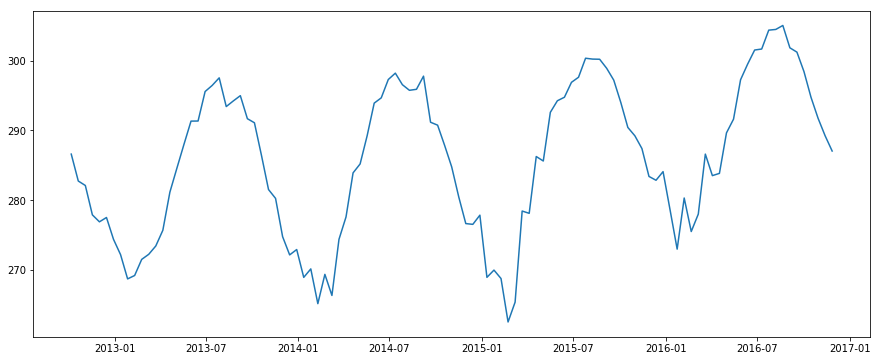

In [8]:
plt.plot(ts)

In [9]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts.values)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.553502
p-value: 0.000002


In [10]:
df = ts.to_frame()

In [11]:
from pmdarima.arima.utils import ndiffs

y = ts

## Adf Test
print('adf:', ndiffs(y, test='adf')) # 2

# KPSS test
print('kpss:', ndiffs(y, test='kpss')) # 0

# PP test:
print('pp:', ndiffs(y, test='pp')) # 2

adf: 0
kpss: 0
pp: 1


## Eliminating Trend and Seasonality

### Differencing

### Decomposing

## Forecasting a Time Series

In [12]:
pd.DataFrame({'orig': ts, 'diff': ts.diff(), 'diff7': ts.diff(7),
              '2diff': ts.diff().diff(), '3diff': ts.diff().diff().diff()}).tail(10)

,orig,diff,diff7,2diff,3diff
date,,,,,
2016-07-24,304.341945,2.698036,20.472575,2.555551,4.435983
2016-08-07,304.443244,0.101299,14.786954,-2.596737,-5.152287
2016-08-21,305.011293,0.568049,13.395896,0.466749,3.063486
2016-09-04,301.815992,-3.195301,4.564209,-3.763349,-4.230098
2016-09-18,301.199570,-0.616422,1.721063,2.578879,6.342228
2016-10-02,298.418243,-2.781328,-3.083181,-2.164906,-4.743784
2016-10-16,294.736702,-3.681541,-6.907207,-0.900213,1.264692
2016-10-30,291.750059,-2.986643,-12.591886,0.694898,1.595112
2016-11-13,289.246283,-2.503776,-15.196961,0.482867,-0.212032


In [16]:
seasonal = 24 # 365 dias / período

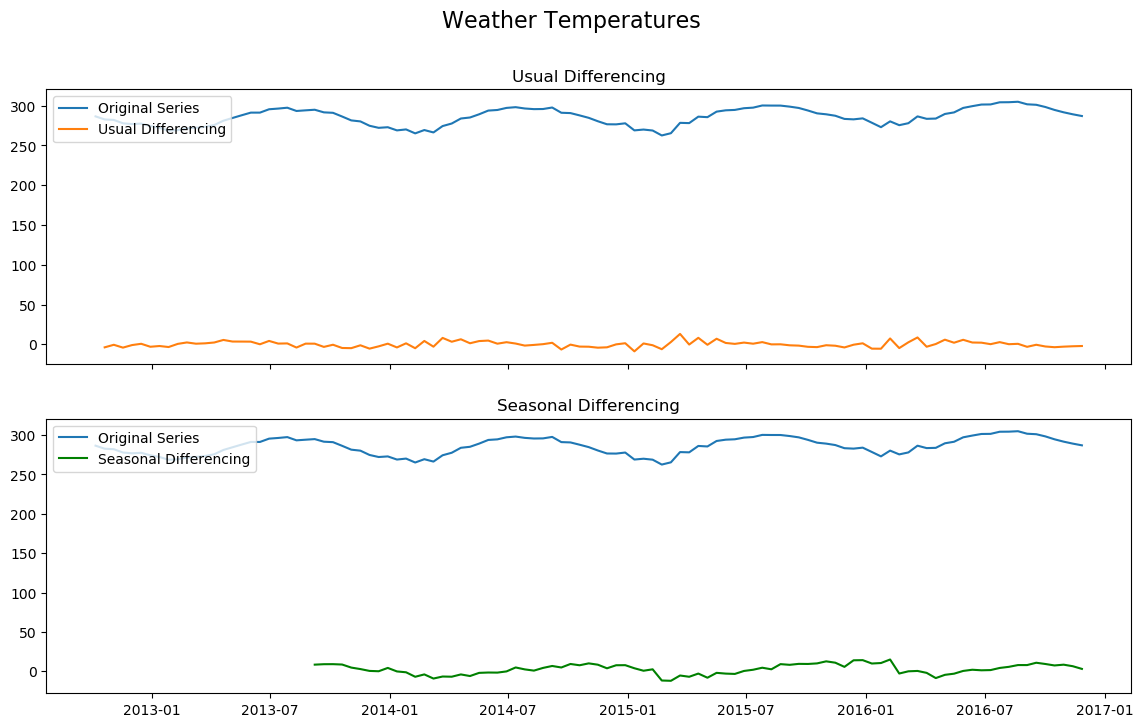

In [101]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(14,8), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(ts, label='Original Series')
axes[0].plot(ts.diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)

# Seasonal 1st
axes[1].plot(ts, label='Original Series')
axes[1].plot(ts.diff(seasonal), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Weather Temperatures', fontsize=16)
plt.show()

In [18]:
# Create Training and Test
corte = int(len(ts) * 0.7)
train = ts[:corte].dropna()
test = ts[corte:].dropna()
print(train.shape, test.shape)

(76,) (33,)


In [102]:
test.index

DatetimeIndex(['2015-09-06', '2015-09-20', '2015-10-04', '2015-10-18',
               '2015-11-01', '2015-11-15', '2015-11-29', '2015-12-13',
               '2015-12-27', '2016-01-10', '2016-01-24', '2016-02-07',
               '2016-02-21', '2016-03-06', '2016-03-20', '2016-04-03',
               '2016-04-17', '2016-05-01', '2016-05-15', '2016-05-29',
               '2016-06-12', '2016-06-26', '2016-07-10', '2016-07-24',
               '2016-08-07', '2016-08-21', '2016-09-04', '2016-09-18',
               '2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27'],
              dtype='datetime64[ns]', name='date', freq='2W-SUN')

In [21]:
from pmdarima import auto_arima

# Seasonal - fit stepwise auto-ARIMA
smodel = auto_arima(ts, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=seasonal,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=False, 
                         stepwise=True)

smodel.summary()

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 24); AIC=nan, BIC=nan, Fit time=nan seconds


/opt/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 24); AIC=557.700, BIC=562.586, Fit time=1.600 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 24); AIC=472.099, BIC=481.869, Fit time=14.963 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 24); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 1, 0, 24); AIC=473.546, BIC=480.874, Fit time=1.531 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 1, 0, 24); AIC=472.369, BIC=484.582, Fit time=34.968 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 1, 24); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 1, 1, 24); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(1, 1, 0, 24); AIC=547.294, BIC=554.622, Fit time=5.940 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(1, 1, 0, 24); AIC=471.611, BIC=483.825, Fit time=12.616 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(1, 1, 0, 24); AIC=473.560, BIC

/opt/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(3, 0, 2) seasonal_order=(1, 1, 0, 24); AIC=455.867, BIC=475.408, Fit time=68.948 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 1, 0, 24); AIC=457.941, BIC=475.040, Fit time=18.189 seconds


/opt/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(3, 0, 2) seasonal_order=(2, 1, 0, 24); AIC=443.933, BIC=465.916, Fit time=279.860 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(2, 1, 1, 24); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 1, 0, 24); AIC=nan, BIC=nan, Fit time=nan seconds


/opt/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(3, 0, 3) seasonal_order=(2, 1, 0, 24); AIC=447.934, BIC=472.360, Fit time=327.431 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(2, 1, 0, 24); AIC=474.671, BIC=491.769, Fit time=58.580 seconds
Total fit time: 1040.614 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  109
Model:             SARIMAX(3, 0, 2)x(2, 1, 0, 24)   Log Likelihood                -212.966
Date:                            Wed, 28 Aug 2019   AIC                            443.933
Time:                                    21:44:26   BIC                            465.916
Sample:                                         0   HQIC                           452.775
                                            - 109                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2814      0.059      4.788      0.000       0.166       0.397
ar.L1          2.1246      0.148     14.327      0.000       1.834       2.415
ar.L2         -1.3516      0.286     -4.729      0.000      -1.912      -0.791
ar.L3          0.1813      0.146      1.240      0.215      -0.105       0.468
ma.L1         -1.7964      0.138    -13.043      0.000      -2.066      -1.526
ma.L2          0.8437      0.144      5.878      0.000       0.562       1.125
ar.S.L24      -0.7040      0.088     -8.006      0.000      -0.876      -0.532
ar.S.L48      -0.6181      0.069     -8.901      0.000      -0.754      -0.482
sigma2         5.9673      1.269      4.702      0.000       3.480       8.455
===================================================================================
Ljung-Box (Q):                       32.44   Jarque-Bera (JB):                 6.54
Prob(Q):                              0.80   Prob(JB):                         0.04
Heteroskedasticity (H):               2.45   Skew:                            -0.56
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

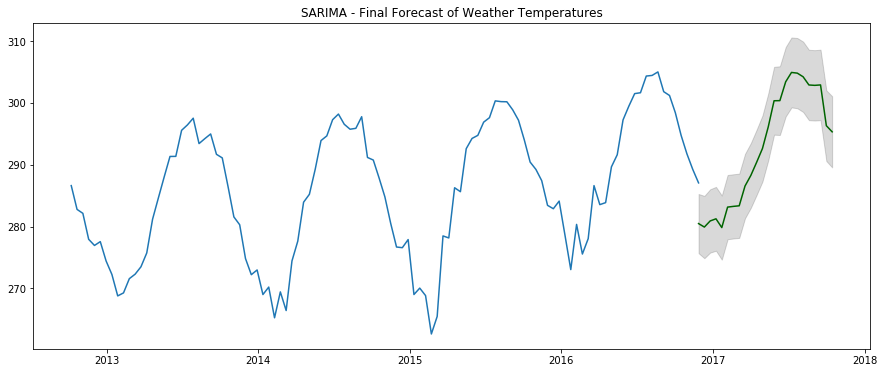

In [110]:
# Forecast
n_periods = seasonal #52 #24 #12 # 1 ano
freq = '2W' #'15D' #'M' # mês
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods=n_periods, freq=freq)

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Weather Temperatures")
plt.show()

In [168]:
ts.tail()

date
2016-10-02    298.418243
2016-10-16    294.736702
2016-10-30    291.750059
2016-11-13    289.246283
2016-11-27    287.063672
Freq: 2W-SUN, Name: temperature, dtype: float64

In [179]:
dates_2w = pd.date_range(start=ts.index[-1]+1, end='2018-01-01', freq='2W')
dates_2w

DatetimeIndex(['2016-12-11', '2016-12-25', '2017-01-08', '2017-01-22',
               '2017-02-05', '2017-02-19', '2017-03-05', '2017-03-19',
               '2017-04-02', '2017-04-16', '2017-04-30', '2017-05-14',
               '2017-05-28', '2017-06-11', '2017-06-25', '2017-07-09',
               '2017-07-23', '2017-08-06', '2017-08-20', '2017-09-03',
               '2017-09-17', '2017-10-01', '2017-10-15', '2017-10-29',
               '2017-11-12', '2017-11-26', '2017-12-10', '2017-12-24'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [184]:
n_periods = len(dates_2w)
freq = '2W'
fitted = smodel.predict(n_periods=n_periods)
fitted

array([280.48256399, 279.91935761, 280.91010686, 281.25463381,
       279.83596974, 283.14688397, 283.26494689, 283.36020668,
       286.55923886, 288.27106937, 290.40146198, 292.62329717,
       296.12819283, 300.34614898, 300.36797047, 303.41423432,
       304.92620829, 304.81463039, 304.22462331, 302.89851911,
       302.83852364, 302.90740285, 296.31285443, 295.3208043 ,
       290.34453744, 283.43683603, 283.20623193, 287.72490412])

In [185]:
len(dates_2w)

28

In [186]:
len(fitted)

28

In [187]:
df = pd.DataFrame({
    'date': dates_2w,
    'temperature': fitted
})
df.set_index('date', inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28 entries, 2016-12-11 to 2017-12-24
Data columns (total 1 columns):
temperature    28 non-null float64
dtypes: float64(1)
memory usage: 448.0 bytes


,temperature
date,
2016-12-11,280.482564
2016-12-25,279.919358
2017-01-08,280.910107
2017-01-22,281.254634
2017-02-05,279.835970


In [188]:
df = (data.iloc[-2:]).append(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2016-11-13 to 2017-12-24
Data columns (total 1 columns):
temperature    30 non-null float64
dtypes: float64(1)
memory usage: 480.0 bytes


In [189]:
real_data = pd.read_csv('weather-solution.csv', index_col='date', parse_dates=['date'])
real_data.head()

,temperature
date,
2016-11-17,13.760203
2016-11-18,21.451060
2016-11-19,13.059696
2016-11-20,8.178332
2016-11-21,6.044745


In [192]:
df2 = df.resample('D').interpolate(method='cubic')

start = real_data.index[0]
df2 = df2[start:'2017-11-29']

df2['temperature'] -= 273.15

df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 378 entries, 2016-11-17 to 2017-11-29
Freq: D
Data columns (total 1 columns):
temperature    378 non-null float64
dtypes: float64(1)
memory usage: 5.9 KB


,temperature
date,
2016-11-17,16.773300
2016-11-18,16.740049
2016-11-19,16.636443
2016-11-20,16.467806
2016-11-21,16.239462


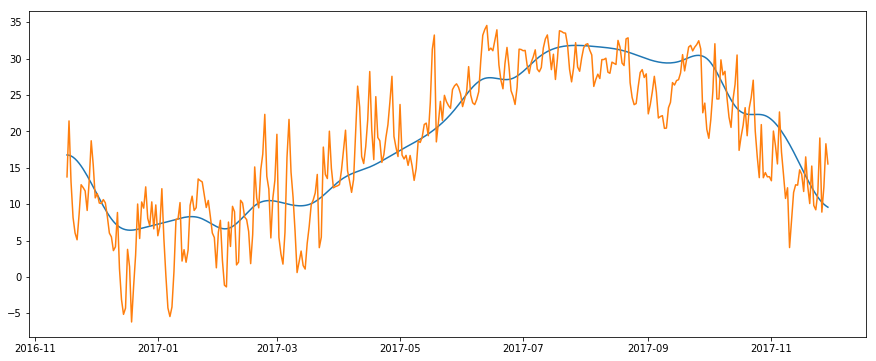

In [193]:
plt.plot(df2)
plt.plot(real_data)

In [194]:
df2.to_csv('weather-submission-arima.csv')